<center><img src="Logolink_OP_VVV_hor_barva_cz.jpg" width="600px"/></center>

#### <center>ESF projekt Západočeské univerzity v Plzni reg. č. CZ.02.2.69/0.0/0.0/16 015/0002287</center>

# KKY/USVP 5 Thermal Imaging

There are several companies producing thermal cameras. FLIR, Optris, Workswell. 

In this lecture, we will work with a camera FLIR T640.

**Used library:** https://pypi.org/project/flirimageextractor/, https://github.com/nationaldronesau/FlirImageExtractor

**Prerequisity:** https://exiftool.org/index.html on linux Ubuntu just type **sudo apt install exiftool** into terminal

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import flirimageextractor
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np

## How to load an image

In [43]:
flir = flirimageextractor.FlirImageExtractor(palettes=[cm.jet, cm.bwr, cm.gist_ncar])
flir.process_image('./cviceni_5/FLIR0805.jpg')

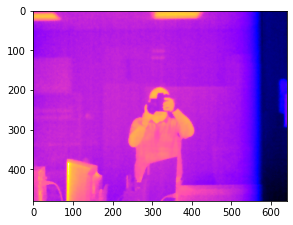

In [44]:
flir.plot()

Note that the glass behaves like a mirror in the infrared

## How to get thermal data

In [45]:
img = flir.get_thermal_np()

<class 'numpy.float64'> 24.31294485740625 28.775005506518937


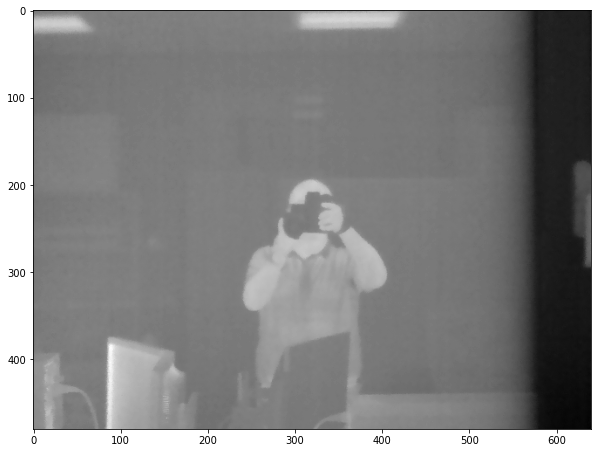

In [46]:
plt.figure(1, figsize(10,10))
plt.imshow(img, cmap="gray")
print(type(img[0,0]), np.min(img), np.max(img))

## How to get metadata

In [7]:
meta = flir.get_metadata('cviceni_5/FLIR0811.jpg')

### List of all metadata in the image file

In [8]:
print(meta.keys())

dict_keys(['SourceFile', 'ExifToolVersion', 'FileName', 'Directory', 'FileSize', 'FileModifyDate', 'FileAccessDate', 'FileInodeChangeDate', 'FilePermissions', 'FileType', 'FileTypeExtension', 'MIMEType', 'JFIFVersion', 'ExifByteOrder', 'Make', 'Model', 'Orientation', 'XResolution', 'YResolution', 'ResolutionUnit', 'Software', 'ModifyDate', 'YCbCrPositioning', 'ExposureTime', 'ExifVersion', 'CreateDate', 'ComponentsConfiguration', 'SubjectDistance', 'FocalLength', 'ImageTemperatureMax', 'ImageTemperatureMin', 'FlashpixVersion', 'ColorSpace', 'ExifImageWidth', 'ExifImageHeight', 'DigitalZoomRatio', 'ImageUniqueID', 'Compression', 'ThumbnailOffset', 'ThumbnailLength', 'CreatorSoftware', 'Emissivity', 'ObjectDistance', 'ReflectedApparentTemperature', 'AtmosphericTemperature', 'IRWindowTemperature', 'IRWindowTransmission', 'RelativeHumidity', 'PlanckR1', 'PlanckB', 'PlanckF', 'AtmosphericTransAlpha1', 'AtmosphericTransAlpha2', 'AtmosphericTransBeta1', 'AtmosphericTransBeta2', 'AtmosphericTr

In [9]:
print(meta["Emissivity"])

0.95


In [10]:
print(meta["CameraTemperatureRangeMax"])

150.0 C


## How to get a raw thermal data

In [11]:
raw_data = meta.get("RawThermalImage")

In [12]:
print(raw_data)

(Binary data 240492 bytes, use -b option to extract)


In [13]:
import io
import os
import subprocess
from PIL import Image

thermal_img_bytes = subprocess.check_output(["exiftool", "-RawThermalImage", "-b", 'cviceni_5/FLIR0811.jpg'])

In [14]:
print(thermal_img_bytes)

9d\x03\xd2\x1c\xd3\xfb\x9c\x95\x8b\xcaVZb\x17\xc0\xb8E\x99,`\x021\xf3\x00\xa2\xe8.S=\xb6,\'\x92\x0b\x01\x8c\xd04\x98\x9als\x01g\xb0.@S\xba\xe9\x87\x89\x01\xa5\xf8\xec\xa7p\xe0\x9d\\$\xef\x04x\xf0\xf2\x8e\xbc\x99\x97\x9b\xbb\x80\x92+\xe7z\xf8\xe7N`[\xe6\xd2\x9ac\x00\xb5\xca\x8b\xe2\xb9-J\xb2p\x14\x99\xca\x8a\x08\xcdp_\xed\x9ds\x07\xc5oL\xd1\x0f\xec1\xe5\xbf\xb9k\xc1\x8f\xec9l\x9f\xb6\xca\xf0\xa1\x9d\xa3\x93\x02\x1fM\x81\x94^\xc2Dc\xb8S\xa5 \x83\xef$\x0720\xec\xee\xea\xc3\xd4\xc9\x8do\xf4\x1cE\x99\xbe\xa2\xca\x05\x85"\xd4Q$\x1b\xee\x0b\xffA\x94\xeb\xe8\x83:\xcb\x93\x16%z)\xfc\xe8S\x88B\x03%6\n\xb2\xfe\x07X\xe7\xd8\x88\xebh\x0f\x8a\xb9\x1fy\xebE\x1eS\x1b\x9fiIr\x84(\xee\xdf4\xcb\xd1\x02\x8c\xf1\x0b&\xfa\x92\x0eWh\xa1~\xe7\x95\x02\xdb\xa0a^!\x99\x97\xd4i\x85{\xd9\x1f\xe6Iq\x9c\xcf4\xd6\xa4Y\xf2\xb5}\xa2\xeb\x9f\xea\xbeBe\x13a\xe3\xa1cE\x96\xaep\x06\xfd\xd5S!\x9b\\\xb5\xe35P\x85\x1f~`L\xdc\xb7Y\x1bbHy\xa4\x9d$\xde\xa1k\x1f\xe3\xd0nh\x0f\x13\xce\x85P\xd6#\xab\xb0\xa4\x1f\x1e\xdaZ\xddZ(\x1dB"

In [15]:
thermal_img_stream = io.BytesIO(thermal_img_bytes)
thermal_img_stream.seek(0)

thermal_img = Image.open(thermal_img_stream)
thermal_np = np.array(thermal_img)

<class 'numpy.int32'> 56 65339


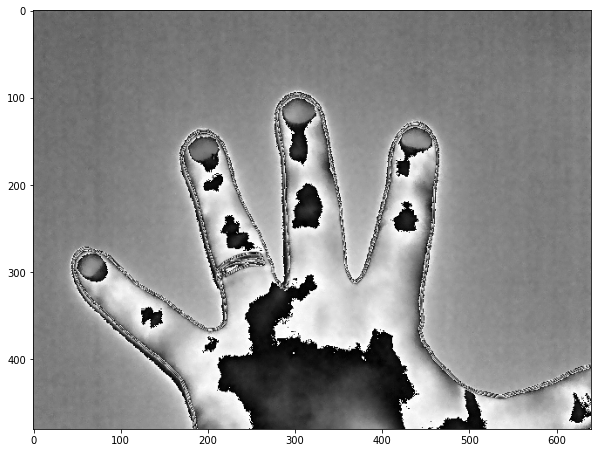

In [16]:
plt.figure(1, figsize(10,10))
plt.imshow(thermal_np, cmap="gray")
print(type(thermal_np[0,0]), np.min(thermal_np), np.max(thermal_np))

## How to transform RAW values into temperature

In [17]:
args = [
                "exiftool",
                "-Emissivity",
                "-SubjectDistance",
                "-AtmosphericTemperature",
                "-ReflectedApparentTemperature",
                "-IRWindowTemperature",
                "-IRWindowTransmission",
                "-RelativeHumidity",
                "-PlanckR1",
                "-PlanckB",
                "-PlanckF",
                "-PlanckO",
                "-PlanckR2",
                "-j",
                "-",
            ]

In [ ]:
def raw2temp(
        raw,
        E=1,
        OD=1,
        RTemp=20,
        ATemp=20,
        IRWTemp=20,
        IRT=1,
        RH=50,
        PR1=21106.77,
        PB=1501,
        PF=1,
        PO=-7340,
        PR2=0.012545258,
    ):
        """
        convert raw values from the flir sensor to temperatures in C
        # this calculation has been ported to python from
        # https://github.com/gtatters/Thermimage/blob/master/R/raw2temp.R
        # a detailed explanation of what is going on here can be found there
        """

        # constants
        ATA1 = 0.006569
        ATA2 = 0.01262
        ATB1 = -0.002276
        ATB2 = -0.00667
        ATX = 1.9

        # transmission through window (calibrated)
        emiss_wind = 1 - IRT
        refl_wind = 0

        # transmission through the air
        h2o = (RH / 100) * exp(
            1.5587
            + 0.06939 * (ATemp)
            - 0.00027816 * (ATemp) ** 2
            + 0.00000068455 * (ATemp) ** 3
        )
        tau1 = ATX * exp(-sqrt(OD / 2) * (ATA1 + ATB1 * sqrt(h2o))) + (1 - ATX) * exp(
            -sqrt(OD / 2) * (ATA2 + ATB2 * sqrt(h2o))
        )
        tau2 = ATX * exp(-sqrt(OD / 2) * (ATA1 + ATB1 * sqrt(h2o))) + (1 - ATX) * exp(
            -sqrt(OD / 2) * (ATA2 + ATB2 * sqrt(h2o))
        )

        # radiance from the environment
        raw_refl1 = PR1 / (PR2 * (exp(PB / (RTemp + 273.15)) - PF)) - PO
        raw_refl1_attn = (1 - E) / E * raw_refl1
        raw_atm1 = PR1 / (PR2 * (exp(PB / (ATemp + 273.15)) - PF)) - PO
        raw_atm1_attn = (1 - tau1) / E / tau1 * raw_atm1
        raw_wind = PR1 / (PR2 * (exp(PB / (IRWTemp + 273.15)) - PF)) - PO
        raw_wind_attn = emiss_wind / E / tau1 / IRT * raw_wind
        raw_refl2 = PR1 / (PR2 * (exp(PB / (RTemp + 273.15)) - PF)) - PO
        raw_refl2_attn = refl_wind / E / tau1 / IRT * raw_refl2
        raw_atm2 = PR1 / (PR2 * (exp(PB / (ATemp + 273.15)) - PF)) - PO
        raw_atm2_attn = (1 - tau2) / E / tau1 / IRT / tau2 * raw_atm2

        raw_obj = (
            raw / E / tau1 / IRT / tau2
            - raw_atm1_attn
            - raw_atm2_attn
            - raw_wind_attn
            - raw_refl1_attn
            - raw_refl2_attn
        )

        # temperature from radiance
        temp_celcius = PB / np.log(PR1 / (PR2 * (raw_obj + PO)) + PF) - 273.15
        return temp_celcius